<a href="https://colab.research.google.com/github/Loga19818eeanvesh/Natural_Language_Processing_Sequence_Models_Assignments/blob/main/tf_c3w3_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


In [2]:
embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
training_portion=0.9
test_portion=.1

corpus = []

In [6]:
!gdown --id 1wd8KaeCSHxt-nEpMeuHFSNWrDp8joUXJ

Downloading...
From: https://drive.google.com/uc?id=1wd8KaeCSHxt-nEpMeuHFSNWrDp8joUXJ
To: /content/training_cleaned.csv
100% 239M/239M [00:03<00:00, 70.3MB/s]


In [7]:
num_sentences = 0

with open("./training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        list_item.append(row[0])
        num_sentences = num_sentences + 1
        corpus.append(list_item)

In [47]:
print(num_sentences)
print(len(corpus))


1599999
1599999


In [48]:

training_size = 100000
testing_size = 10000
random.shuffle(corpus)
sentences=[corpus[i][0] for i in range(training_size)]
training_labels=[corpus[i][1] for i in range(training_size)]


tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)+1

sequences = tokenizer.texts_to_sequences(sentences)
training_sequences = pad_sequences(sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)


test_sentences = [corpus[i][0] for i in range(training_size,testing_size+training_size)]
sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences = pad_sequences(sequences,padding=padding_type,maxlen=max_length,truncating=trunc_type)

test_labels = [corpus[i][1] for i in range(training_size,testing_size+training_size)]

In [49]:

training_labels = [0 if i=='0' else 1 for i in training_labels]
test_labels = [0 if i=='0' else 1 for i in test_labels]
training_labels = np.array(training_labels)
training_sequences = np.array(training_sequences)
test_labels = np.array(test_labels)
test_sequences = np.array(test_sequences)


In [50]:
print(vocab_size)
print(len(word_index))
print(word_index)

98390
98389
{'<UNK>': 1, 'i': 2, 'to': 3, 'the': 4, 'a': 5, 'my': 6, 'and': 7, 'you': 8, 'it': 9, 'is': 10, 'in': 11, 'for': 12, 'of': 13, 'on': 14, 'me': 15, 'so': 16, 'have': 17, 'that': 18, 'but': 19, "i'm": 20, 'just': 21, 'with': 22, 'at': 23, 'be': 24, 'not': 25, 'was': 26, 'this': 27, 'now': 28, 'up': 29, 'good': 30, 'day': 31, 'get': 32, 'all': 33, 'out': 34, 'are': 35, 'like': 36, 'no': 37, 'go': 38, 'http': 39, 'quot': 40, 'do': 41, "it's": 42, 'love': 43, 'your': 44, 'today': 45, 'too': 46, 'going': 47, 'work': 48, 'got': 49, 'lol': 50, 'from': 51, 'time': 52, 'one': 53, 'what': 54, 'back': 55, 'u': 56, 'im': 57, 'will': 58, 'we': 59, 'com': 60, 'about': 61, 'know': 62, 'am': 63, 'really': 64, 'can': 65, 'amp': 66, "don't": 67, 'had': 68, 'see': 69, 'some': 70, 'still': 71, "can't": 72, 'its': 73, 'if': 74, 'night': 75, 'think': 76, 'how': 77, 'well': 78, 'want': 79, '2': 80, 'home': 81, 'new': 82, 'as': 83, 'oh': 84, 'when': 85, 'there': 86, 'thanks': 87, 'more': 88, 'miss'

In [28]:
# Note this is the 100 dimension version of GloVe from Stanford

# glove.6B.100d.txt
!gdown --id 1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g


Downloading...
From: https://drive.google.com/uc?id=1W5vZy2etitAblLdFn8_DxnsQKzfFJ98g
To: /content/glove.6B.100d.txt
100% 347M/347M [00:02<00:00, 146MB/s]


In [51]:
embeddings_index = {};
with open('./glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [52]:
print(len(embeddings_matrix))

98390


In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 16, 100)           9839000   
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 8)                 1032      
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,924,521
Trainable params: 85,521
Non-trainable params: 9,839,000
_________________________________________________________________


In [54]:
num_epochs = 10
history = model.fit(training_sequences, training_labels, epochs=num_epochs, validation_data=(test_sequences, test_labels), verbose=2)


Epoch 1/10
3125/3125 - 52s - loss: 0.5441 - accuracy: 0.7201 - val_loss: 0.5133 - val_accuracy: 0.7453 - 52s/epoch - 17ms/step
Epoch 2/10
3125/3125 - 48s - loss: 0.4948 - accuracy: 0.7569 - val_loss: 0.4951 - val_accuracy: 0.7585 - 48s/epoch - 15ms/step
Epoch 3/10
3125/3125 - 48s - loss: 0.4690 - accuracy: 0.7743 - val_loss: 0.4805 - val_accuracy: 0.7680 - 48s/epoch - 15ms/step
Epoch 4/10
3125/3125 - 48s - loss: 0.4473 - accuracy: 0.7883 - val_loss: 0.4765 - val_accuracy: 0.7720 - 48s/epoch - 15ms/step
Epoch 5/10
3125/3125 - 47s - loss: 0.4251 - accuracy: 0.8017 - val_loss: 0.4835 - val_accuracy: 0.7694 - 47s/epoch - 15ms/step
Epoch 6/10
3125/3125 - 47s - loss: 0.4016 - accuracy: 0.8160 - val_loss: 0.4913 - val_accuracy: 0.7658 - 47s/epoch - 15ms/step
Epoch 7/10
3125/3125 - 47s - loss: 0.3790 - accuracy: 0.8278 - val_loss: 0.5088 - val_accuracy: 0.7632 - 47s/epoch - 15ms/step
Epoch 8/10
3125/3125 - 47s - loss: 0.3548 - accuracy: 0.8418 - val_loss: 0.5173 - val_accuracy: 0.7602 - 47s/ep

<Figure size 432x288 with 0 Axes>

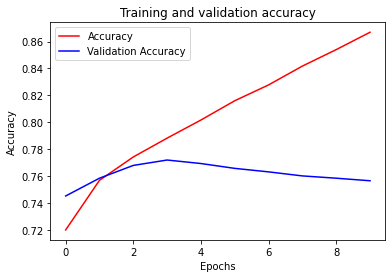

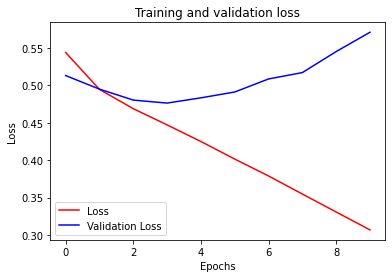

<Figure size 432x288 with 0 Axes>

In [55]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()